In [1]:
%cd ..

/media/atem/Data/HSE_videos/Project/sheaf-convolution


/media/atem/Data/HSE_videos/Project/sheaf-convolution/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from utils_comet import export_synth_exp_group_table, export_real_exp_group_table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_NAME = "sheaf-diffusion"
WORKSPACE_NAME = "artem-d"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
datasets = ["roman-empire", "amazon-ratings", "minesweeper", "tolokers"]

In [33]:
all_dfs = []

for name in datasets:
    exp_group = f"real_{name}"
    df = export_real_exp_group_table(WORKSPACE_NAME, PROJECT_NAME, exp_group)
    df['dataset'] = name
    all_dfs.append(df)

df_all = pd.concat(all_dfs, ignore_index=True)

In [34]:
df_all.head()

,model_name,model/total_params,best_epoch,best_val_ap,best_val_auc,test_ap_at_best_val,test_auc_at_best_val,dataset/name,dataset
0,GAE,54080,408,0.671241,0.636760,0.456452,0.455788,HeteroGraphDataset,roman-empire
1,GAE,54080,1095,0.691286,0.654897,0.420599,0.379313,HeteroGraphDataset,roman-empire
2,GAE,54080,793,0.688925,0.652727,0.430017,0.405189,HeteroGraphDataset,roman-empire
3,Diffusion,35466,400,0.745993,0.725208,0.746171,0.719846,HeteroGraphDataset,roman-empire
4,Diffusion,35466,646,0.765223,0.740054,0.765606,0.731082,HeteroGraphDataset,roman-empire


In [75]:
agg = df_all.groupby(['model_name', 'dataset']).agg(
          mean_ap_val=("best_val_ap", "mean"),
          std_ap_val=("best_val_ap", "std"),
          mean_auc_val=("best_val_auc", "mean"),
          mean_ap_test=("test_ap_at_best_val", "mean"),
          std_ap_test=("test_ap_at_best_val", "std")
      ).reset_index()
agg["dataset"] = pd.Categorical(agg["dataset"], categories=datasets, ordered=True)
agg = agg.sort_values("dataset")

In [70]:
agg

,model_name,dataset,mean_ap_val,mean_auc_val
2,Diffusion,roman-empire,0.763969,0.734114
6,GAE,roman-empire,0.683818,0.648128
0,Diffusion,amazon-ratings,0.982270,0.980864
4,GAE,amazon-ratings,0.728506,0.724915
1,Diffusion,minesweeper,0.869191,0.877119
5,GAE,minesweeper,0.895282,0.895271
3,Diffusion,tolokers,0.965455,0.962451
7,GAE,tolokers,0.959050,0.956538


In [73]:
agg.round(2).pivot_table(index="model_name", columns="dataset")

/tmp/ipykernel_539203/2443560242.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  agg.round(2).pivot_table(index="model_name", columns="dataset")


mean_ap_val                                     mean_auc_val  \
dataset    roman-empire amazon-ratings minesweeper tolokers roman-empire   
model_name                                                                 
Diffusion          0.76           0.98        0.87     0.97         0.73   
GAE                0.68           0.73        0.90     0.96         0.65   

                                                
dataset    amazon-ratings minesweeper tolokers  
model_name                                      
Diffusion            0.98        0.88     0.96  
GAE                  0.72        0.90     0.96

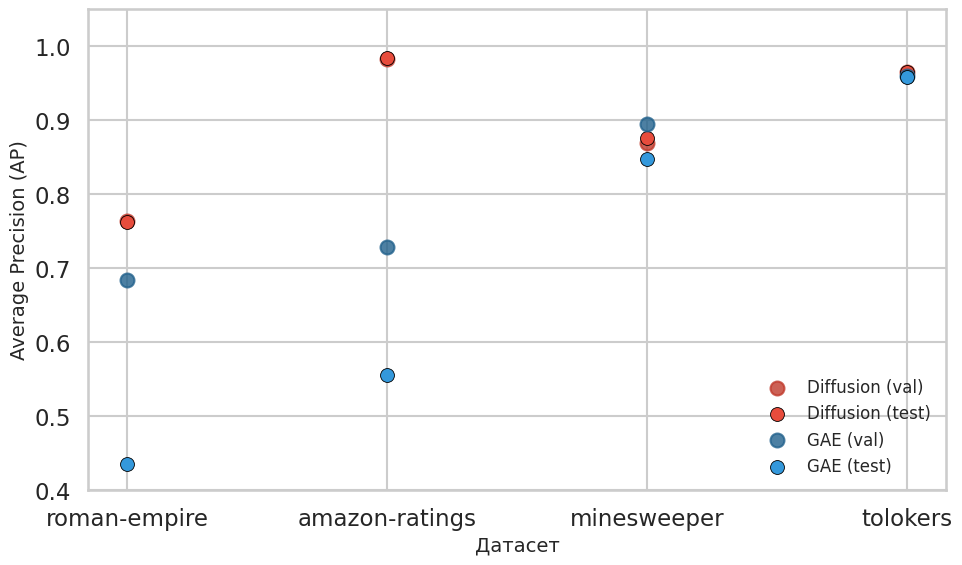

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style="whitegrid", context="talk")

# plt.figure(figsize=(10, 6))

# for model in agg["model_name"].unique():
#     sub = agg[agg["model_name"] == model]
    
#     # Линия среднего
#     plt.plot(sub["dataset/num_nodes"], sub["mean_ap"], marker="o", label=model)
    
#     # Область стандартного отклонения
#     plt.fill_between(
#         sub["dataset/num_nodes"],
#         sub["mean_ap"] - sub["std_ap"],
#         sub["mean_ap"] + sub["std_ap"],
#         alpha=0.2
#     )

# plt.title("Зависимость AP от количества вершин графа", fontsize=16)
# plt.xlabel("Количество вершин")
# plt.ylabel("AP")
# plt.legend(title="Модель", loc='lower right')
# plt.tight_layout()
# plt.savefig('synth_size.jpg')
# plt.show()

sns.set(style="whitegrid", context="talk")

# sns.set_context("talk")

df_plot = df.copy()

plt.figure(figsize=(10, 6))

colors = {
    "Diffusion": ("#e74c3c", "#c0392b"),  
    "GAE": ("#3498db", "#21618c")         
}

for model, (color_test, color_val) in colors.items():
    sub = agg[agg["model_name"] == model]

    plt.scatter(
        sub["dataset"],
        sub["mean_ap_val"],
        color=color_val,
        label=f"{model} (val)",
        s=100,
        alpha=0.8
    )

    plt.scatter(
        sub["dataset"],
        sub["mean_ap_test"],
        color=color_test,
        label=f"{model} (test)",
        s=100,
        alpha=1.0,
        edgecolor="black",
        linewidth=0.6
    )

plt.title("", fontsize=16)
plt.xlabel("Датасет", fontsize=14)
plt.ylabel("Average Precision (AP)", fontsize=14)
plt.ylim(0.4, 1.05)
plt.legend(fontsize=12, loc="lower right")
plt.tight_layout()
plt.savefig('real_tests.jpg')
plt.show()